# Property Search Demo


Add client here


In [2]:
from clip_client import Client
from docarray import DocumentArray, Document

client = Client('grpc://0.0.0.0:61000')


## True data:

Deserialization


In [9]:
import json

with open("listing-details.json", "r") as listing:
    property_details_json = json.load(listing)

property_details = property_details_json['data']['listings']
property_details_size = len(property_details)
print("size of property details: ", property_details_size)
print(property_details[0])


size of property details:  124
{'id': '435662148', 'address': {'display': {'fullAddress': '2 Bedroom/20 Festival Place, Newstead, Qld 4006', 'shortAddress': '2 Bedroom/20 Festival Place'}, 'suburb': 'Newstead', 'state': 'Qld', 'postcode': '4006'}, '_links': {'canonical': {'path': '/property-apartment-qld-newstead-435662148'}}, 'media': {'mainImage': {'templatedUrl': 'https://i2.au.reastatic.net/800x600-fit/12f38d49ef4d155ffd1e75c39af38c275afb7768eaf3f471e7a023e90bf19079/image.png'}}, 'price': {'display': 'BRAND NEW - From $900'}, 'bond': {'display': '$3,600'}, 'availableDate': {'display': 'Available now'}, 'generalFeatures': {'bedrooms': {'value': 2}, 'bathrooms': {'value': 2}, 'parkingSpaces': {'value': 1}}}


Construct Document


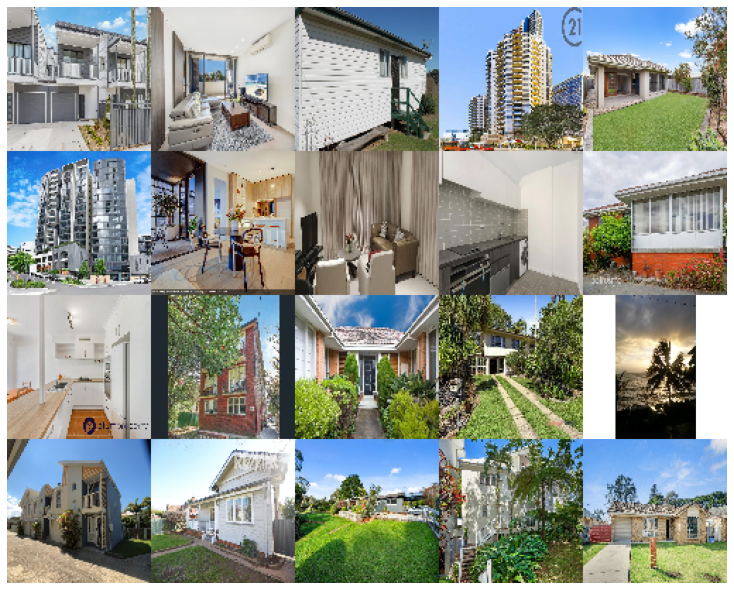

╭────────────────────── Documents Summary ──────────────────────╮
│                                                               │
│   Type                   DocumentArrayInMemory                │
│   Length                 20                                   │
│   Homogenous Documents   True                                 │
│   Common Attributes      ('id', 'mime_type', 'uri', 'tags')   │
│   Multimodal dataclass   False                                │
│                                                               │
╰───────────────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    20               False             │
│   mime_type   ('str',)    2                False             │
│   tags        ('dict',)   20               False             │
│   uri         ('str',)    20               False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

In [25]:
property_docs = DocumentArray(
    map(
        lambda detail: Document(
            tags = detail,
            uri= detail['media']['mainImage']['templatedUrl']
        ),
        property_details[1:21]
    )
)
property_docs.plot_image_sprites()
property_docs


Encode

In [28]:
property_docs = client.encode(property_docs, show_progress=True)

Output()

Search

Output()

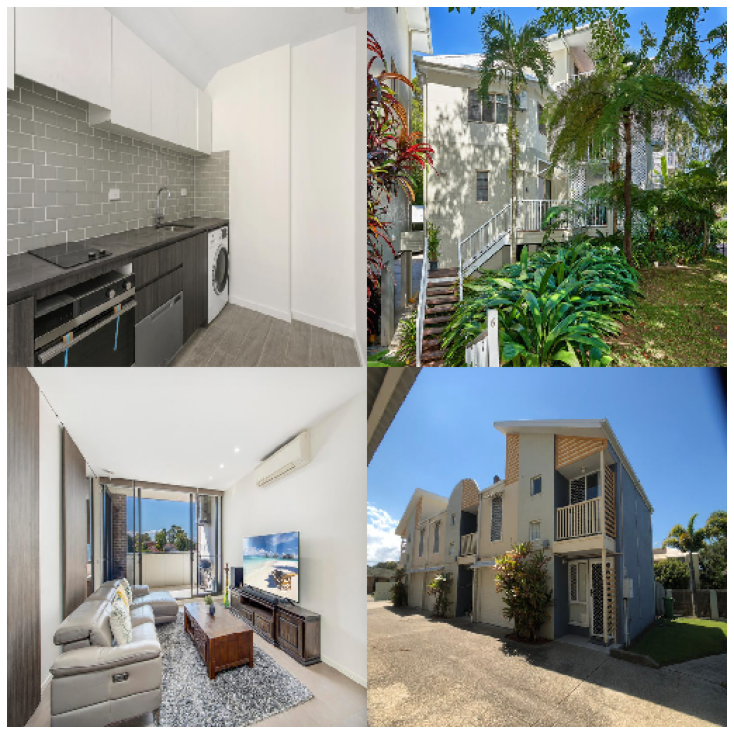

{'id': '428439326', 'address': {'display': {'fullAddress': '2-4 Little Street, Dulwich Hill, NSW 2203', 'shortAddress': '2-4 Little Street'}, 'suburb': 'Dulwich Hill', 'state': 'NSW', 'postcode': '2203'}, '_links': {'canonical': {'path': '/property-studio-nsw-dulwich+hill-428439326'}}, 'media': {'mainImage': {'templatedUrl': 'https://i2.au.reastatic.net/800x600-fit/7ecc82ae226cd8500e674eafa98bdc189e19e5ee0942dd46198a5d8ca1bf237a/image.jpg'}}, 'price': {'display': '$450 per week'}, 'bond': {'display': '$840'}, 'availableDate': {'display': 'Available 02 Dec 2022'}, 'generalFeatures': {'bedrooms': {'value': 1}, 'bathrooms': {'value': 1}, 'parkingSpaces': {'value': 0}}}


In [31]:
vector = client.encode(["apartment"], show_progress=True)
res = property_docs.find(vector, limit=4)
res[0].plot_image_sprites()
print(res[0][0].tags)

## Demo data:

Load the images here


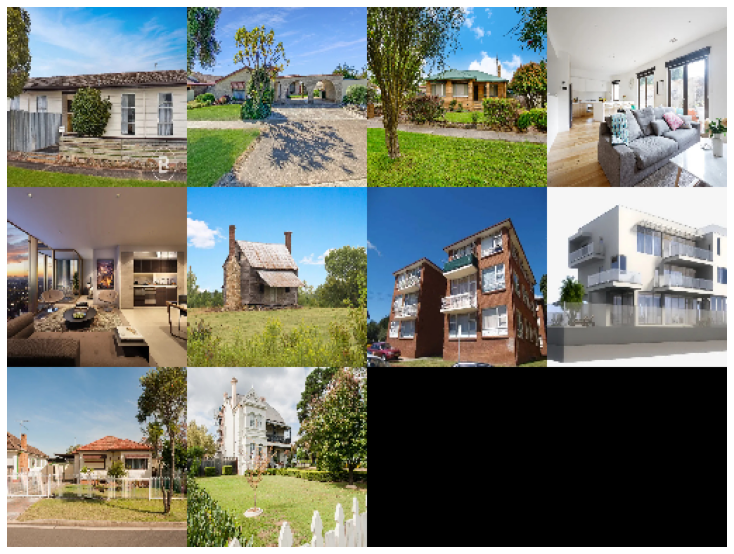

╭────────────────── Documents Summary ──────────────────╮
│                                                       │
│   Type                   DocumentArrayInMemory        │
│   Length                 10                           │
│   Homogenous Documents   True                         │
│   Common Attributes      ('id', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                        │
│                                                       │
╰───────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    10               False             │
│   mime_type   ('str',)    1                False             │
│   uri         ('str',)    10               False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

In [3]:
docs = DocumentArray.from_files('./images/*.jpg')
docs.plot_image_sprites()
docs


Encode the images


Output()

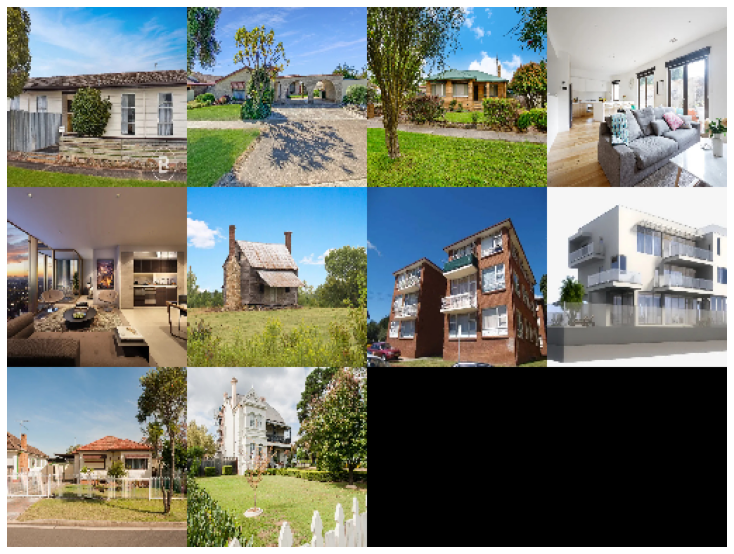

╭──────────────────────────── Documents Summary ─────────────────────────────╮
│                                                                            │
│   Type                   DocumentArrayInMemory                             │
│   Length                 10                                                │
│   Homogenous Documents   True                                              │
│   Common Attributes      ('id', 'blob', 'mime_type', 'uri', 'embedding')   │
│   Multimodal dataclass   False                                             │
│                                                                            │
╰────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   blob        ('bytes',)     10               False             │
│   embedding   ('ndarray',)   10               False             │
│   id          ('str',)       10               False             │
│   mime_type   ('str',)       1                False             │
│   uri         ('str',)       10               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [16]:
docs = client.encode(docs, show_progress=True)
docs.plot_image_sprites()
docs


Search with text


In [19]:
vec = client.encode(["apartment"], show_progress=True)
result = docs.find(query=vec, limit=3)
result


Output()

[<DocumentArray (length=3) at 4548827120>]

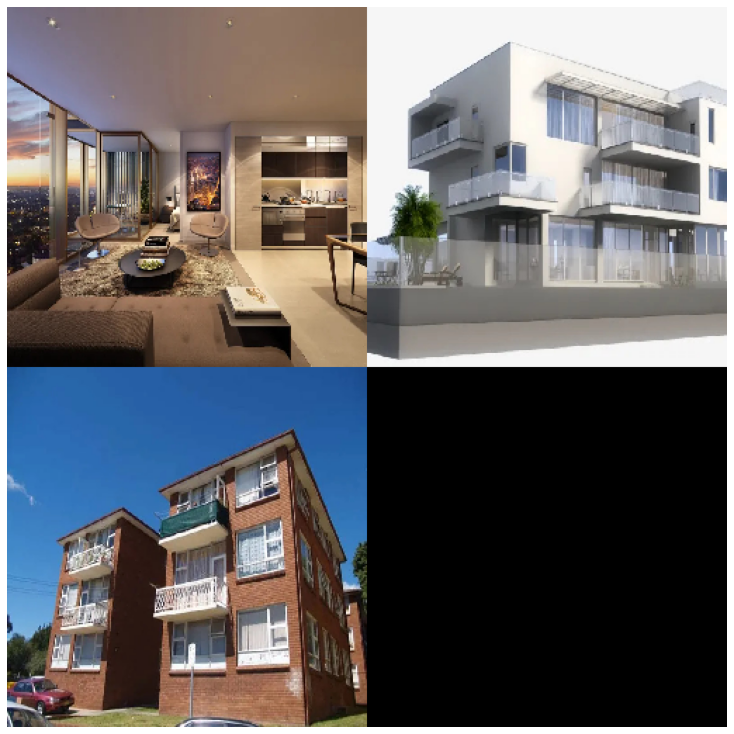

In [20]:
result[0].plot_image_sprites()
